<a href="https://colab.research.google.com/github/eduardoluisvieira/mackenzie/blob/main/PL_A1_modelo_EduardoVieira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# Exercício de Fixação - Texto extraído do artigo da Brasil Logic Sistemas intitulado " As decisões de modernização para a Indústria 4.0"
---





Aqui, criamos um dicionário de têrmos (palavras) sobre o artigo **As decisões de modernização para a Indústria 4.0**. 

1. A primeira célula obtém o artigo na variável `texto`. 
2. Na segunda célula cria o dicionário de têrmos com a estrutura:

```
  mydict = { 'word1': qty, 'word2': qty, 'word3': qty, ...}
```

3. A terceira célula apresenta um gráfico de distribuição dos têrmos do seu dicionário para confirmar a lei de Zipf


A sua tarefa pode empregar outros textos de seu interesse, inclusive em inglês e outras línguas de mesmas características (francês, alemão, espanhol etc.), e você também pode querer empregar arquivos locais. Existem inúmeros pré- tratamentos possíveis nos dados e diferentes formas de exibir os dados. Para o pré tratamento você pode incluir outras transformações para melhorar a qualidade do seu dicionário. Para exibição dos dados você pode empregar o mesmo código ou buscar uma outra forma de sua preferência.

## Aquisição dos Dados

In [5]:
import urllib.request  

texto = []

#Foi colocado o arquivo no Github para facilitar a importação
for line in urllib.request.urlopen('https://raw.githubusercontent.com/eduardoluisvieira/mackenzie/4fcbba8247f69ee66a00afffb676f11cb26441b0/DecisoesdeModernizacao.txt?token=GHSAT0AAAAAABRXNS4NJWWICSJATB6SH26GYQQHPHA'): 
    texto.append(line.decode('utf-8'))

#limpeza dos caracteres não desejáveis na contabilização de termos.
for i in range(len(texto)):
    texto[i] = texto[i].lower() # para unicidade
    texto[i] = texto[i].replace('\n','')
    texto[i] = texto[i].replace('.','')
    texto[i] = texto[i].replace(',','')
    texto[i] = texto[i].replace('(','')
    texto[i] = texto[i].replace(')','')
    texto[i] = texto[i].replace('?','')
    texto[i] = texto[i].replace('•','')
    texto[i] = texto[i].replace(';','')
    texto[i] = texto[i].replace('-','')
    texto[i] = texto[i].replace(':','')
    texto[i] = texto[i].replace('\'','') # elimina ' e "
    


# Construção do Dicionário

In [6]:
mydict = {}                             # crie um dicionário vazio

for line in texto:

  line = line.lower()                   # converte para lower
  words = line.split()                  # separa cada palavra
#  print(words)

  for word in words:                      # para cada palavra em words
    if word not in mydict.keys():         # se palavra não está no dicionário 
      mydict[word] = 1                    # acrescenta a word com o valor 1
    else:                                 # se a entrada já existe 
      mydict[word] =  mydict[word] + 1    # apenas soma 1 ao valor já existente

print(mydict)    

{'as': 13, 'decisões': 1, 'de': 73, 'modernização': 1, 'para': 27, 'a': 31, 'indústria': 7, '40': 10, 'traz': 1, 'uma': 9, 'nova': 3, 'forma': 2, 'comportamento': 1, 'das': 10, 'pessoas': 2, 'pela': 1, 'combinação': 2, 'esferas': 2, 'biológica': 1, 'física': 1, 'e': 41, 'digital': 2, 'tecnologias': 7, 'habilitadoras': 2, 'começam': 1, 'repaginar': 1, 'toda': 1, 'cadeia': 5, 'produtiva': 1, 'com': 16, 'base': 1, 'em': 18, 'dinâmica': 2, 'consumo': 4, 'novos': 1, 'desafios': 2, 'manufatura': 1, 'que': 21, 'passa': 1, 'ser': 5, 'demandada': 1, 'por': 6, 'mais': 7, 'flexibilidade': 1, 'customização': 1, 'dos': 7, 'produtos': 1, 'acordo': 2, 'o': 16, 'idc': 1, 'melhor': 2, 'estrutura': 2, 'análise': 3, 'dados': 5, 'beneficiada': 1, 'uso': 6, 'dessas': 1, 'impactaram': 1, 'melhoria': 1, '20%': 1, 'no': 6, 'lucro': 1, '16%': 2, 'na': 12, 'eficiência': 1, 'operacional': 1, 'é': 8, 'um': 5, 'processo': 1, 'sem': 4, 'volta': 1, 'mas': 4, 'isso': 2, 'não': 7, 'significa': 1, 'sua': 1, 'adoção': 1

# Exibição dos Resultados

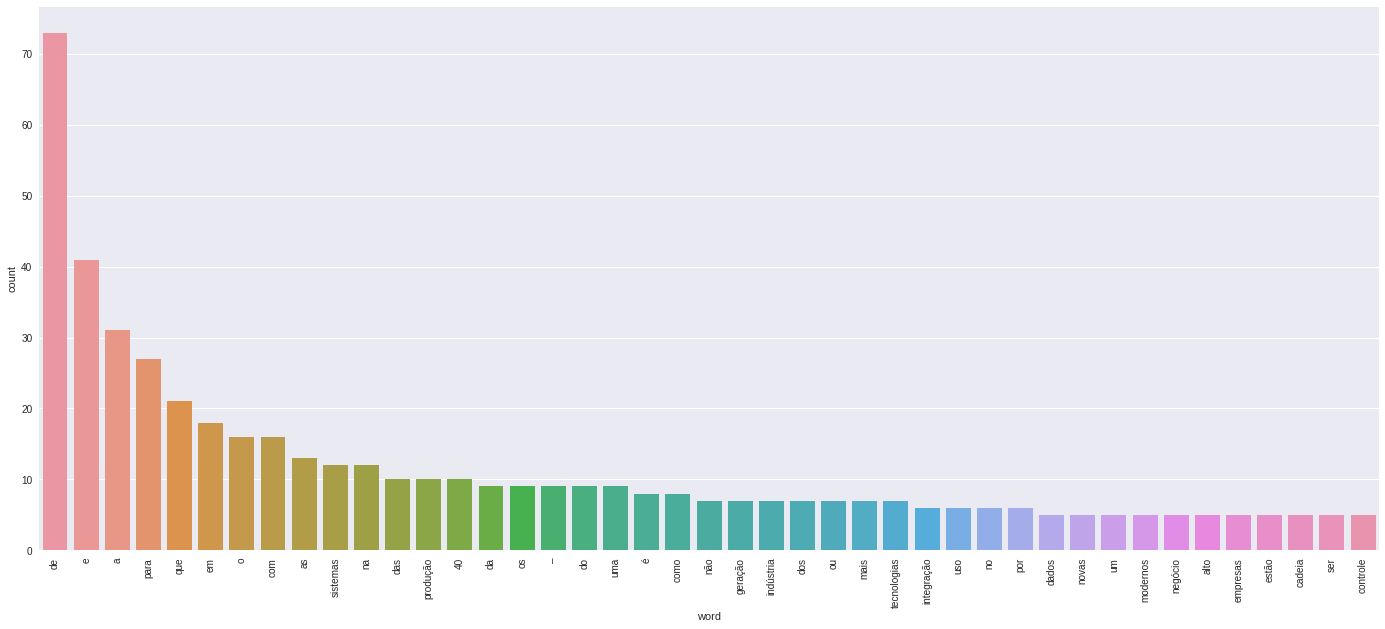

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.DataFrame(mydict.items(),  columns=['word', 'count']).sort_values('count',ascending=False)
df = df[df['count'] > 4] # somente termos com mais de 4 ocorrências
# df = df.iloc[ np.int(len(df)/2) - 10 : np.int(len(df)/2) + 10 ] # para livros ou textos com muitos termos limita a um número mínimo de termos

plt.figure(figsize=(24,10))
mpl.style.use(['seaborn'])
sns.barplot(x=df.word,y=df['count'])
plt.xticks(rotation=90) 

plt.show()

Nota-se a a lei de Zipf pode ser evidenciada pela proporção da frequência entre o primeiro e o segundo termo.
O texto pode ser melhor filtrado, empregando a limpeza de preposições que claramente obtiveram uma alta frequência.
Nesse exercício, incluí a limpeza de alguns caracteres, como: ";","-","•".